# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# build query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&units=imperial" + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=0a54ac486b258717733dc35e3b6436a9&units=imperial&q='

In [4]:
# appended lists
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

# set counts for for loop
record_count = 1
set_count = 1

print("Beginning Data Retrieval")
print("-----------------------------")
                       
# for loop to grab each cities data
for i, city in enumerate(cities):
    # creates sets during data pull
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    record_count += 1
    
    city_url = query_url + city
    
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")    

    
# create dictionary for each cities data
weather_dict = {"City": city_list,
                "Cloudiness": cloudiness_list,
                "Country": country_list,
                "Date": date_list,
                "Humidity": humidity_list,
                "Lat": lat_list,
                "Lng": lng_list,
                "Max_Temp": max_temp_list,
                "Wind_Speed": wind_speed_list}

Beginning Data Retrieval
-----------------------------
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | pa sang
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | ogaminana
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | margate
Processing Record 10 of Set 1 | dunedin
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | balsas
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | sao paulo do potengi
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | ilinskoye-khovanskoye
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | waipawa
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | houma
Processing Record 23 of Set 1 | cherskiy
Processing Record 24 of 

Processing Record 36 of Set 4 | arraial do cabo
Processing Record 37 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 4 | coahuayana
Processing Record 39 of Set 4 | saryshagan
City not found. Skipping...
Processing Record 40 of Set 4 | campbell river
Processing Record 41 of Set 4 | qeshm
Processing Record 42 of Set 4 | mongoumba
Processing Record 43 of Set 4 | nome
Processing Record 44 of Set 4 | tautira
Processing Record 45 of Set 4 | santiago
Processing Record 46 of Set 4 | valdivia
Processing Record 47 of Set 4 | karaul
City not found. Skipping...
Processing Record 48 of Set 4 | killam
Processing Record 49 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 50 of Set 4 | viksoyri
City not found. Skipping...
Processing Record 1 of Set 5 | bathsheba
Processing Record 2 of Set 5 | upernavik
Processing Record 3 of Set 5 | husavik
Processing Record 4 of Set 5 | manzhouli
Processing Record 5 of Set 5 | havre-saint-pierre
Processing Record 6 of Set

Processing Record 22 of Set 8 | sumbe
Processing Record 23 of Set 8 | mumford
Processing Record 24 of Set 8 | saint-francois
Processing Record 25 of Set 8 | pierre
Processing Record 26 of Set 8 | ca mau
Processing Record 27 of Set 8 | geresk
City not found. Skipping...
Processing Record 28 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 29 of Set 8 | ciro marina
Processing Record 30 of Set 8 | jardim
Processing Record 31 of Set 8 | mogadishu
Processing Record 32 of Set 8 | alvorada
Processing Record 33 of Set 8 | nenjiang
Processing Record 34 of Set 8 | erenhot
Processing Record 35 of Set 8 | sivaki
Processing Record 36 of Set 8 | merauke
Processing Record 37 of Set 8 | ajdabiya
Processing Record 38 of Set 8 | otukpo
Processing Record 39 of Set 8 | hay river
Processing Record 40 of Set 8 | todos santos
Processing Record 41 of Set 8 | grand gaube
Processing Record 42 of Set 8 | martapura
Processing Record 43 of Set 8 | neuquen
Processing Record 44 of Set 8 | vostok
Pro

Processing Record 6 of Set 12 | fare
Processing Record 7 of Set 12 | quebo
City not found. Skipping...
Processing Record 8 of Set 12 | bilibino
Processing Record 9 of Set 12 | cuamba
Processing Record 10 of Set 12 | bowen
Processing Record 11 of Set 12 | broome
Processing Record 12 of Set 12 | gao
Processing Record 13 of Set 12 | osakarovka
Processing Record 14 of Set 12 | ossora
Processing Record 15 of Set 12 | biltine
Processing Record 16 of Set 12 | omsk
Processing Record 17 of Set 12 | russell
Processing Record 18 of Set 12 | anito
Processing Record 19 of Set 12 | karaj
Processing Record 20 of Set 12 | honiara
Processing Record 21 of Set 12 | tucumcari
Processing Record 22 of Set 12 | galle
Processing Record 23 of Set 12 | badvel
Processing Record 24 of Set 12 | spencer
Processing Record 25 of Set 12 | hambantota
Processing Record 26 of Set 12 | pudozh
Processing Record 27 of Set 12 | swellendam
Processing Record 28 of Set 12 | biak
Processing Record 29 of Set 12 | riohacha
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create DataFrame and verify counts
weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max_Temp      556
Wind_Speed    556
dtype: int64

In [6]:
#export to csv and display DataFrame
weather_df.to_csv(output_data_file, index=False)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Busselton,72,AU,1563473085,83,-33.64,115.35,55.00,18.70
1,Rikitea,10,PF,1563473085,74,-23.12,-134.97,68.63,31.00
2,Pa Sang,40,TH,1563473086,58,18.53,98.94,86.00,8.05
3,Punta Arenas,75,CL,1563473086,69,-53.16,-70.91,37.40,18.34
4,Ogaminana,100,NG,1563473086,87,7.60,6.20,74.93,5.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

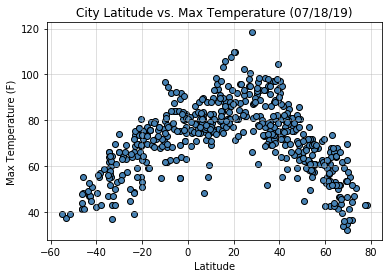

In [11]:
#pull values needed for scatter plot -> latitude & max temperature
lat_coordinates = weather_df["Lat"]
max_temperature = weather_df["Max_Temp"]

# scatter plot and properties
plt.scatter(lat_coordinates, max_temperature, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (07/18/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha = 0.5)

# save and show image
plt.savefig("Images/latvtemp.png")
plt.show()

#### Latitude vs. Humidity Plot

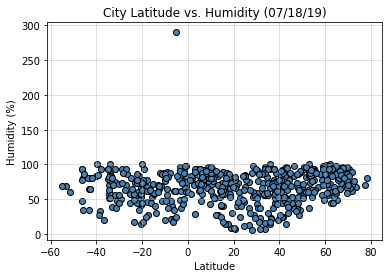

In [12]:
#pull values needed for scatter plot -> latitude & humidity
lat_coordinates = weather_df["Lat"]
humidity_list = weather_df["Humidity"]

# scatter plot and properties
plt.scatter(lat_coordinates, humidity_list, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Humidity (07/18/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha = 0.5)

# save and show image
plt.savefig("Images/latvhumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

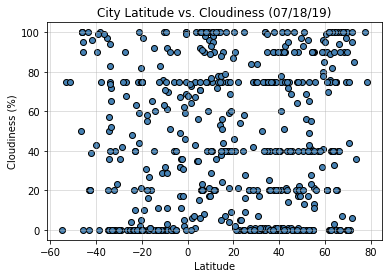

In [13]:
#pull values needed for scatter plot -> latitude & cloudiness
lat_coordinates = weather_df["Lat"]
cloudiness_list = weather_df["Cloudiness"]

# scatter plot and properties
plt.scatter(lat_coordinates, cloudiness_list, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (07/18/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha = 0.5)

# save and show image
plt.savefig("Images/latvcloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

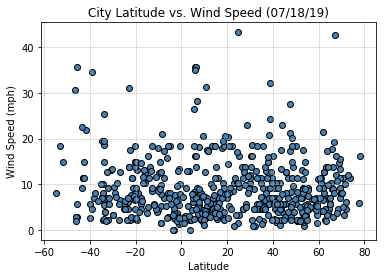

In [14]:
#pull values needed for scatter plot -> latitude & wind speed
lat_coordinates = weather_df["Lat"]
wind_speed_list = weather_df["Wind_Speed"]

# scatter plot and properties
plt.scatter(lat_coordinates, wind_speed_list, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (07/18/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha = 0.5)

# save and show image
plt.savefig("Images/latvwindspeed.png")
plt.show()